In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
species = []
with open('qt_species_list.txt','r') as file:
    for line in file:
        line = line.rstrip()
        line = line[3:]
        species.append(line)
    file.close()

df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)

CH4 = (df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'])
C2H2 = (df_sp['C2H2'] + df_sp['C2H2(V13)']+ df_sp['C2H2(V2)']+ df_sp['C2H2(V5)'])
C2H4 = (df_sp['C2H4'] + df_sp['C2H4(V1)']+ df_sp['C2H4(V2)'])
C2H6 = (df_sp['C2H6'] + df_sp['C2H6(V13)']+ df_sp['C2H6(V24)'])
C3H6 = (df_sp['C3H6'] + df_sp['C3H6(V)'])
C3H8 = (df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])
C4H10 = (df_sp['C4H9H'])
C5H12 = (df_sp['C5H12'])
H2 = df_sp['H2']
C = df_sp['C']
length = df_sp['Time [s]']/2.12*5

In [3]:
df_new = pd.DataFrame({'length':length,'mCH4':CH4, 'mH2':H2, 'mC':C, 'mC2H6':C2H6, 'mC2H4':C2H4, 'mC2H2': C2H2, 'mC3H8': C3H8, 'mC3H6': C3H6, 'mC4H10': C4H10, 'mC5H12': C5H12 })
df_new['MCH4'] = df_new['mCH4'] * 16
df_new['MH2'] = df_new['mH2'] * 2
df_new['MC'] = df_new['mC'] * 12
df_new['MC2H6'] = df_new['mC2H6'] * 30
df_new['MC2H4'] = df_new['mC2H4'] * 28
df_new['MC2H2'] = df_new['mC2H2'] * 26
df_new['MC3H8'] = df_new['mC3H8'] * 44
df_new['MC3H6'] = df_new['mC3H6'] * 42
df_new['MC4H10'] = df_new['mC4H10'] * 58
df_new['MC5H12'] = df_new['mC5H12'] * 72
df_new['totalM'] = df_new['MCH4'] + df_new['MH2'] + df_new['MC'] + df_new['MC2H6'] + df_new['MC2H4'] + df_new['MC2H2'] + df_new['MC3H8'] + df_new['MC3H6'] + df_new['MC4H10'] + df_new['MC5H12']
df_new['rCH4'] = df_new['MCH4'] / df_new['totalM']
df_new['rH2'] = df_new['MH2'] / df_new['totalM']
df_new['rC'] = df_new['MC'] / df_new['totalM']
df_new['rC2H6'] = df_new['MC2H6'] / df_new['totalM']
df_new['rC2H4'] = df_new['MC2H4'] / df_new['totalM']
df_new['rC2H2'] = df_new['MC2H2'] / df_new['totalM']
df_new['rC3H8'] = df_new['MC3H8'] / df_new['totalM']
df_new['rC3H6'] = df_new['MC3H6'] / df_new['totalM']
df_new['rC4H10'] = df_new['MC4H10'] / df_new['totalM']
df_new['rC5H12'] = df_new['MC5H12'] / df_new['totalM']

In [4]:
df_new.to_csv('result1.csv')

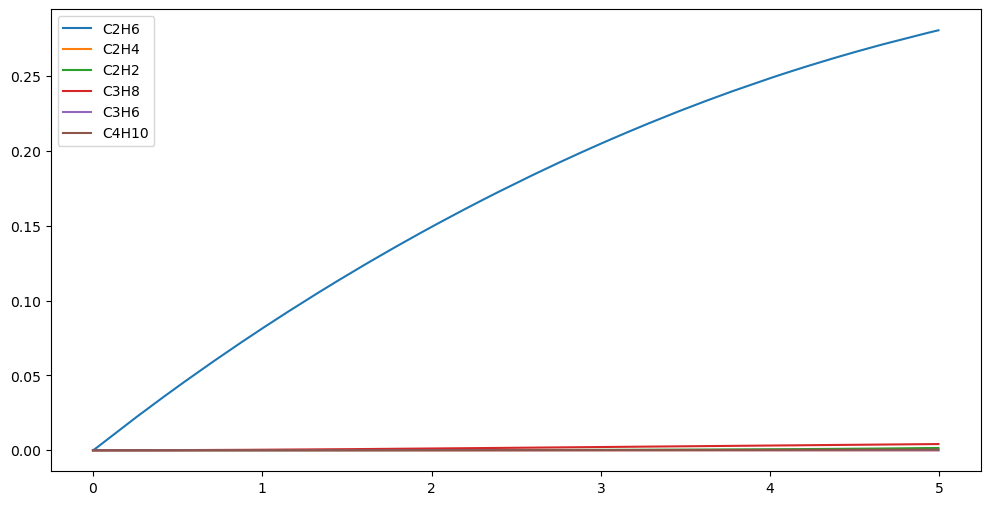

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
#ax.plot(df_new['length'],df_new['rCH4'], label = 'CH4')
#ax.plot(df_new['length'],df_new['rH2'], label = 'H2',)
ax.plot(df_new['length'],df_new['rC2H6'], label = 'C2H6')
ax.plot(df_new['length'],df_new['rC2H4'], label = 'C2H4')
ax.plot(df_new['length'],df_new['rC2H2'], label = 'C2H2')
ax.plot(df_new['length'],df_new['rC3H8'], label = 'C3H8')
ax.plot(df_new['length'],df_new['rC3H6'], label = 'C3H6')
ax.plot(df_new['length'],df_new['rC4H10'], label = 'C4H10')
#ax.plot(df_new['length'],df_new['rC5H12'], label = 'C5+')
#ax.plot(df_new['length'],df_new['rC'], label = 'C')
ax.legend()